# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [39]:
import pandas as pd
import zipfile
from datetime import datetime

### Load Data

In [40]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [41]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [42]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [43]:
!pip3 install matplotlib



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [44]:
import sys
print(sys.executable)
!{sys.executable} -m pip install matplotlib


/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip


In [45]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

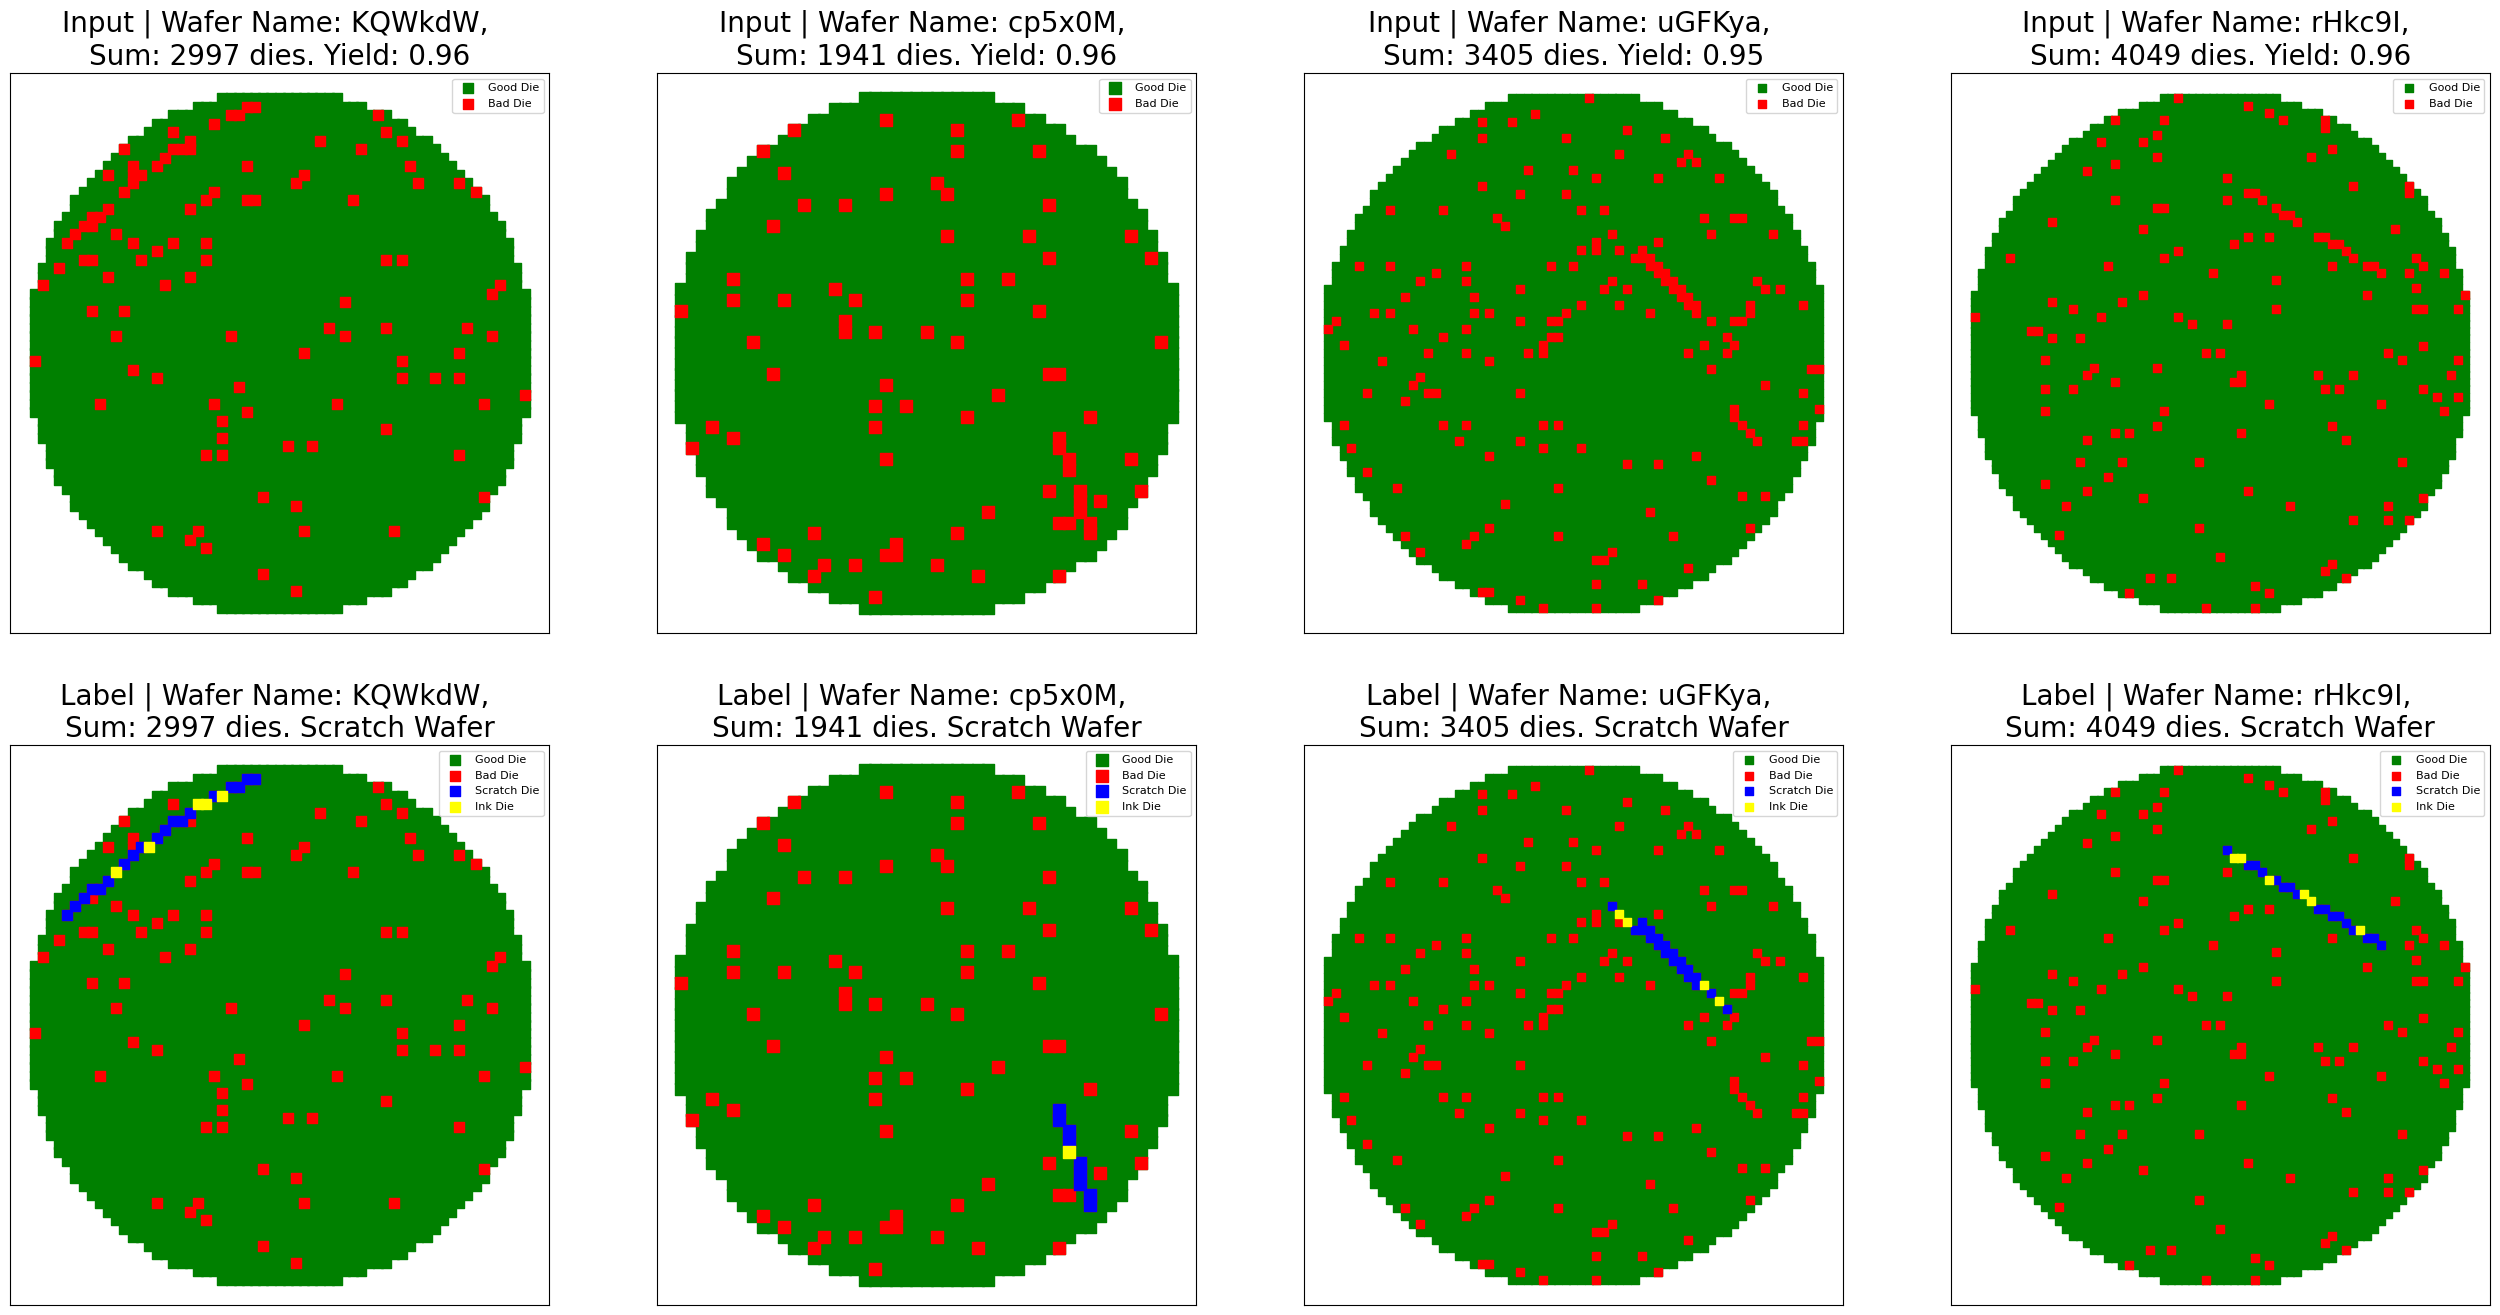

In [46]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

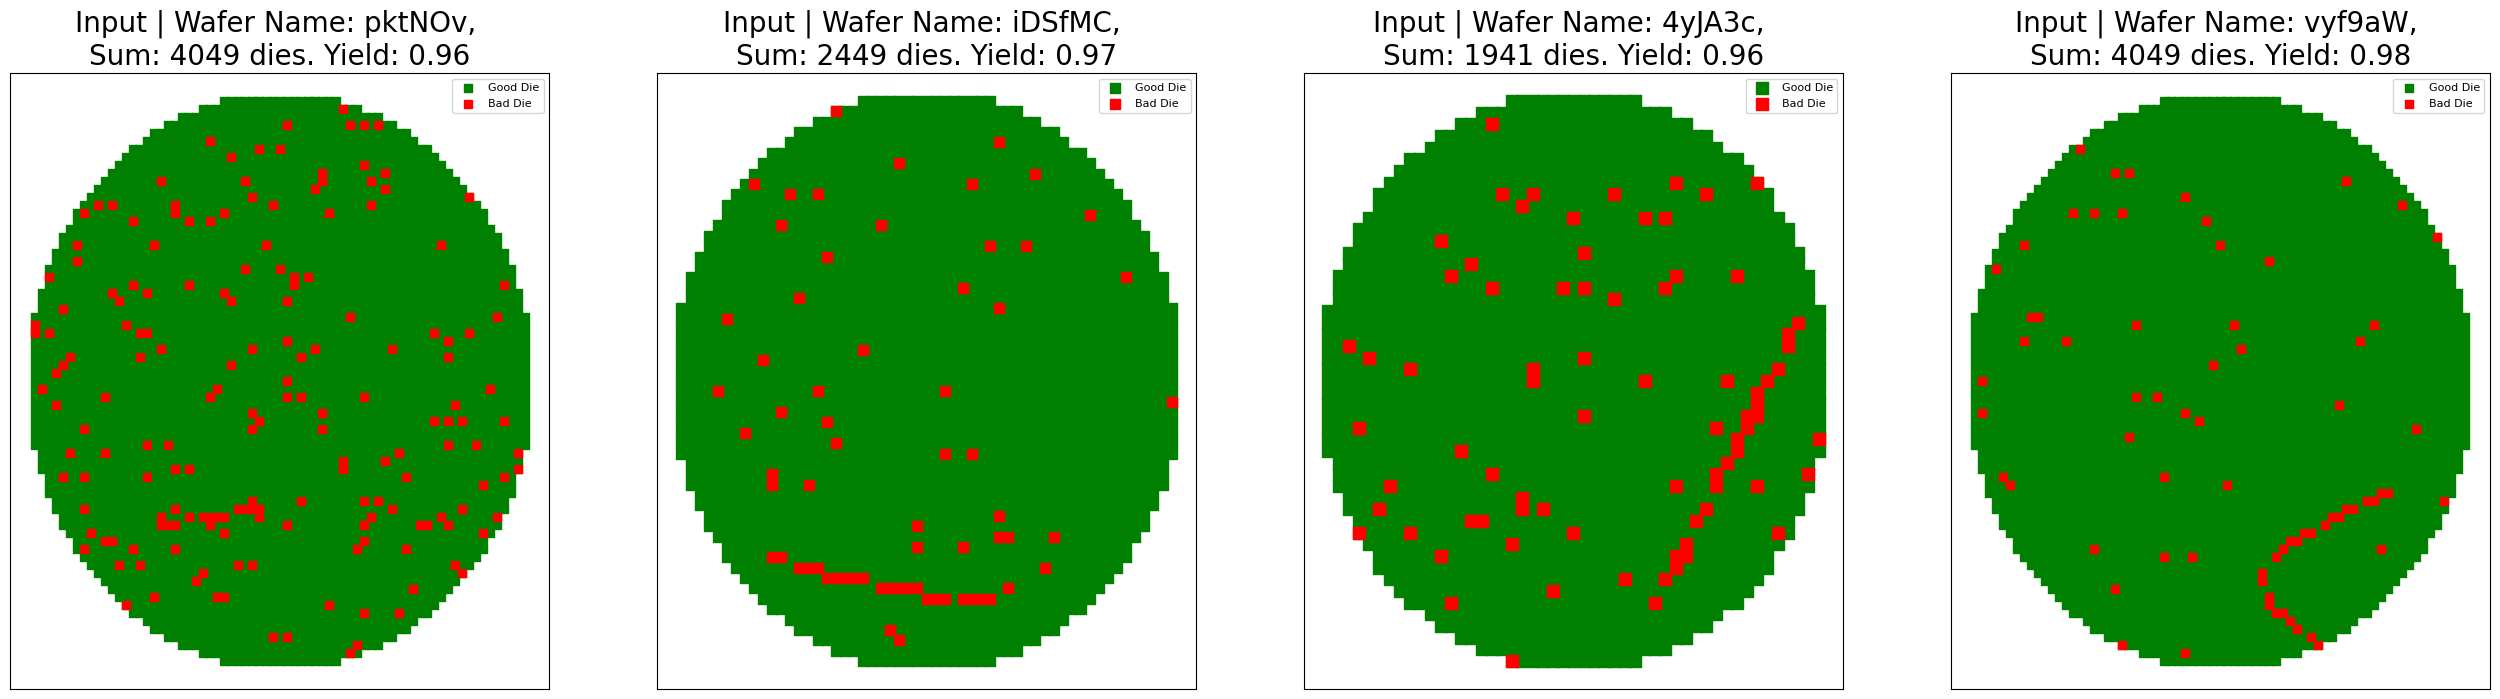

In [47]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

In [48]:

# 1. Choosing the signs
features = ['DieX', 'DieY', 'IsGoodDie']
target = 'IsScratchDie'

# 2. Forming X and y
X_train = df_wafers[features]
y_train = df_wafers[target]

X_train = df_wafers[features].copy()
X_train['IsGoodDie'] = X_train['IsGoodDie'].astype(int)#converts a logical value (True/False) to a numeric value (1/0).
'''
Machine learning models (e.g. RandomForestClassifier) only work with numbers, not with boolean values directly.
Therefore, we explicitly convert bool → int so that the model can use this feature during training.
'''
X_train.head()

,DieX,DieY,IsGoodDie
0,0,27,1
1,0,28,1
2,0,29,1
3,0,30,1
4,0,31,1


In [49]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#1.Split into training and validation samples
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#2.Training the model(Random forest)
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model.fit(X_tr, y_tr)

#3. Prediction
y_pred = clf.predict(X_val)

#4. report output
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98   2067053
        True       0.18      0.84      0.30     16027

    accuracy                           0.97   2083080
   macro avg       0.59      0.90      0.64   2083080
weighted avg       0.99      0.97      0.98   2083080



Select the amount of samples you want to display:Model validation output
At the current stage, the RandomForestClassifier model was trained with the following parameters:

n_estimators = 50 (Originally I took 100 - but the processing time was too long and I did not wait for it and interrupted at 9 minutes and changed the parameter to 50)

class_weight = 'balanced'

Traits used: DieX, DieY, IsGoodDie

The model showed the following metrics on the validation sample:

    Recall by Scratch class (True): 0.84
        -> the model successfully detects 84% of all true scratches

    Precision by Scratch (True) class: 0.18
        -> approximately 18% of "scratch" predictions are really scratches

    F1-score by Scratch class: 0.30
        -> balanced metric, shows quality under class imbalance

Overall accuracy (accuracy): 0.97, but it is not representative due to unbalanced label distribution.

!!! The main task is not to skip scratch (high Recall), and at this stage the model already copes with this quite well

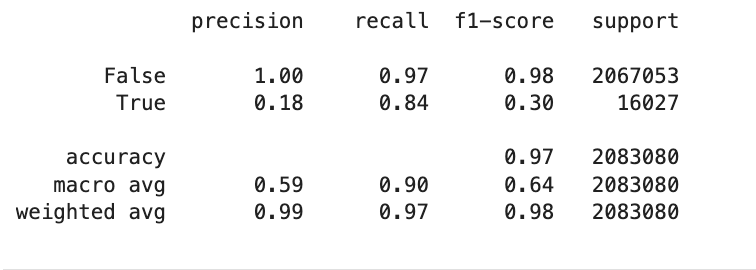

In [51]:
# Removing wafer's with low yield (< 0.6)
wafer_yield = df_wafers_test.groupby('WaferName')['IsGoodDie'].mean()
valid_wafers = wafer_yield[wafer_yield >= 0.6].index
df_wafers_test = df_wafers_test[df_wafers_test['WaferName'].isin(valid_wafers)].copy()

print(f"Left {df_wafers_test['WaferName'].nunique()} wader's adn {len(df_wafers_test)} dies after filtration")


Left 438 wader's adn 1086018 dies after filtration


In [52]:
# Predictions on the test set
# Copy the desired traits from the test
X_test = df_wafers_test[['DieX', 'DieY', 'IsGoodDie']].copy()

# Convert ‘IsGoodDie’ to int
X_test['IsGoodDie'] = X_test['IsGoodDie'].astype(int)

In [53]:
# Model predictions
y_test_pred = model.predict(X_test)

# Let's add a new column to the dataframe
df_wafers_test['IsScratchDie_Predicted'] = y_test_pred


In [54]:
# Save the result to a file
df_wafers_test[['WaferName', 'DieX', 'DieY', 'IsScratchDie_Predicted']].to_csv('submission.csv', index=False)


In [55]:
df_wafers_test[['WaferName', 'DieX', 'DieY', 'IsScratchDie_Predicted']].head()


,WaferName,DieX,DieY,IsScratchDie_Predicted
0,mZa9ls,0,23,False
1,mZa9ls,0,24,False
2,mZa9ls,0,25,False
3,mZa9ls,0,26,False
4,mZa9ls,0,27,False


In [56]:
# How many scratches did the model predict?
df_wafers_test['IsScratchDie_Predicted'].value_counts()


IsScratchDie_Predicted
False    1024290
True       61728
Name: count, dtype: int64

In [57]:
# Percentage of scratches from total number
predicted_scratch_ratio = df_wafers_test['IsScratchDie_Predicted'].mean()
print(f"Scratchy predicted on {predicted_scratch_ratio:.4%} dies")


Scratchy predicted on 5.6839% dies


In [58]:
# Percentage of scratches out of the total numberLet's show 10 predicted scratches
df_wafers_test[df_wafers_test['IsScratchDie_Predicted'] == True].head(10)


,WaferName,DieX,DieY,IsGoodDie,IsScratchDie_Predicted
279,mZa9ls,8,44,False,True
420,mZa9ls,11,47,False,True
432,mZa9ls,12,9,False,True
540,mZa9ls,14,14,False,True
702,mZa9ls,17,11,False,True
704,mZa9ls,17,13,False,True
797,mZa9ls,18,49,False,True
868,mZa9ls,20,5,False,True
869,mZa9ls,20,6,False,True
871,mZa9ls,20,8,False,True


/var/folders/5y/xq11p9xx4md1ktk658q85fmm0000gn/T/ipykernel_59402/927129458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie'] = wafer_df['IsScratchDie_Predicted']
/var/folders/5y/xq11p9xx4md1ktk658q85fmm0000gn/T/ipykernel_59402/927129458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie'] = wafer_df['IsScratchDie_Predicted']
/var/folders/5y/xq11p9xx4md1ktk658q85fmm0000gn/T/ipykernel_59402/927129458.py:7: SettingWithCopyWarning: 
A value is trying to be set 

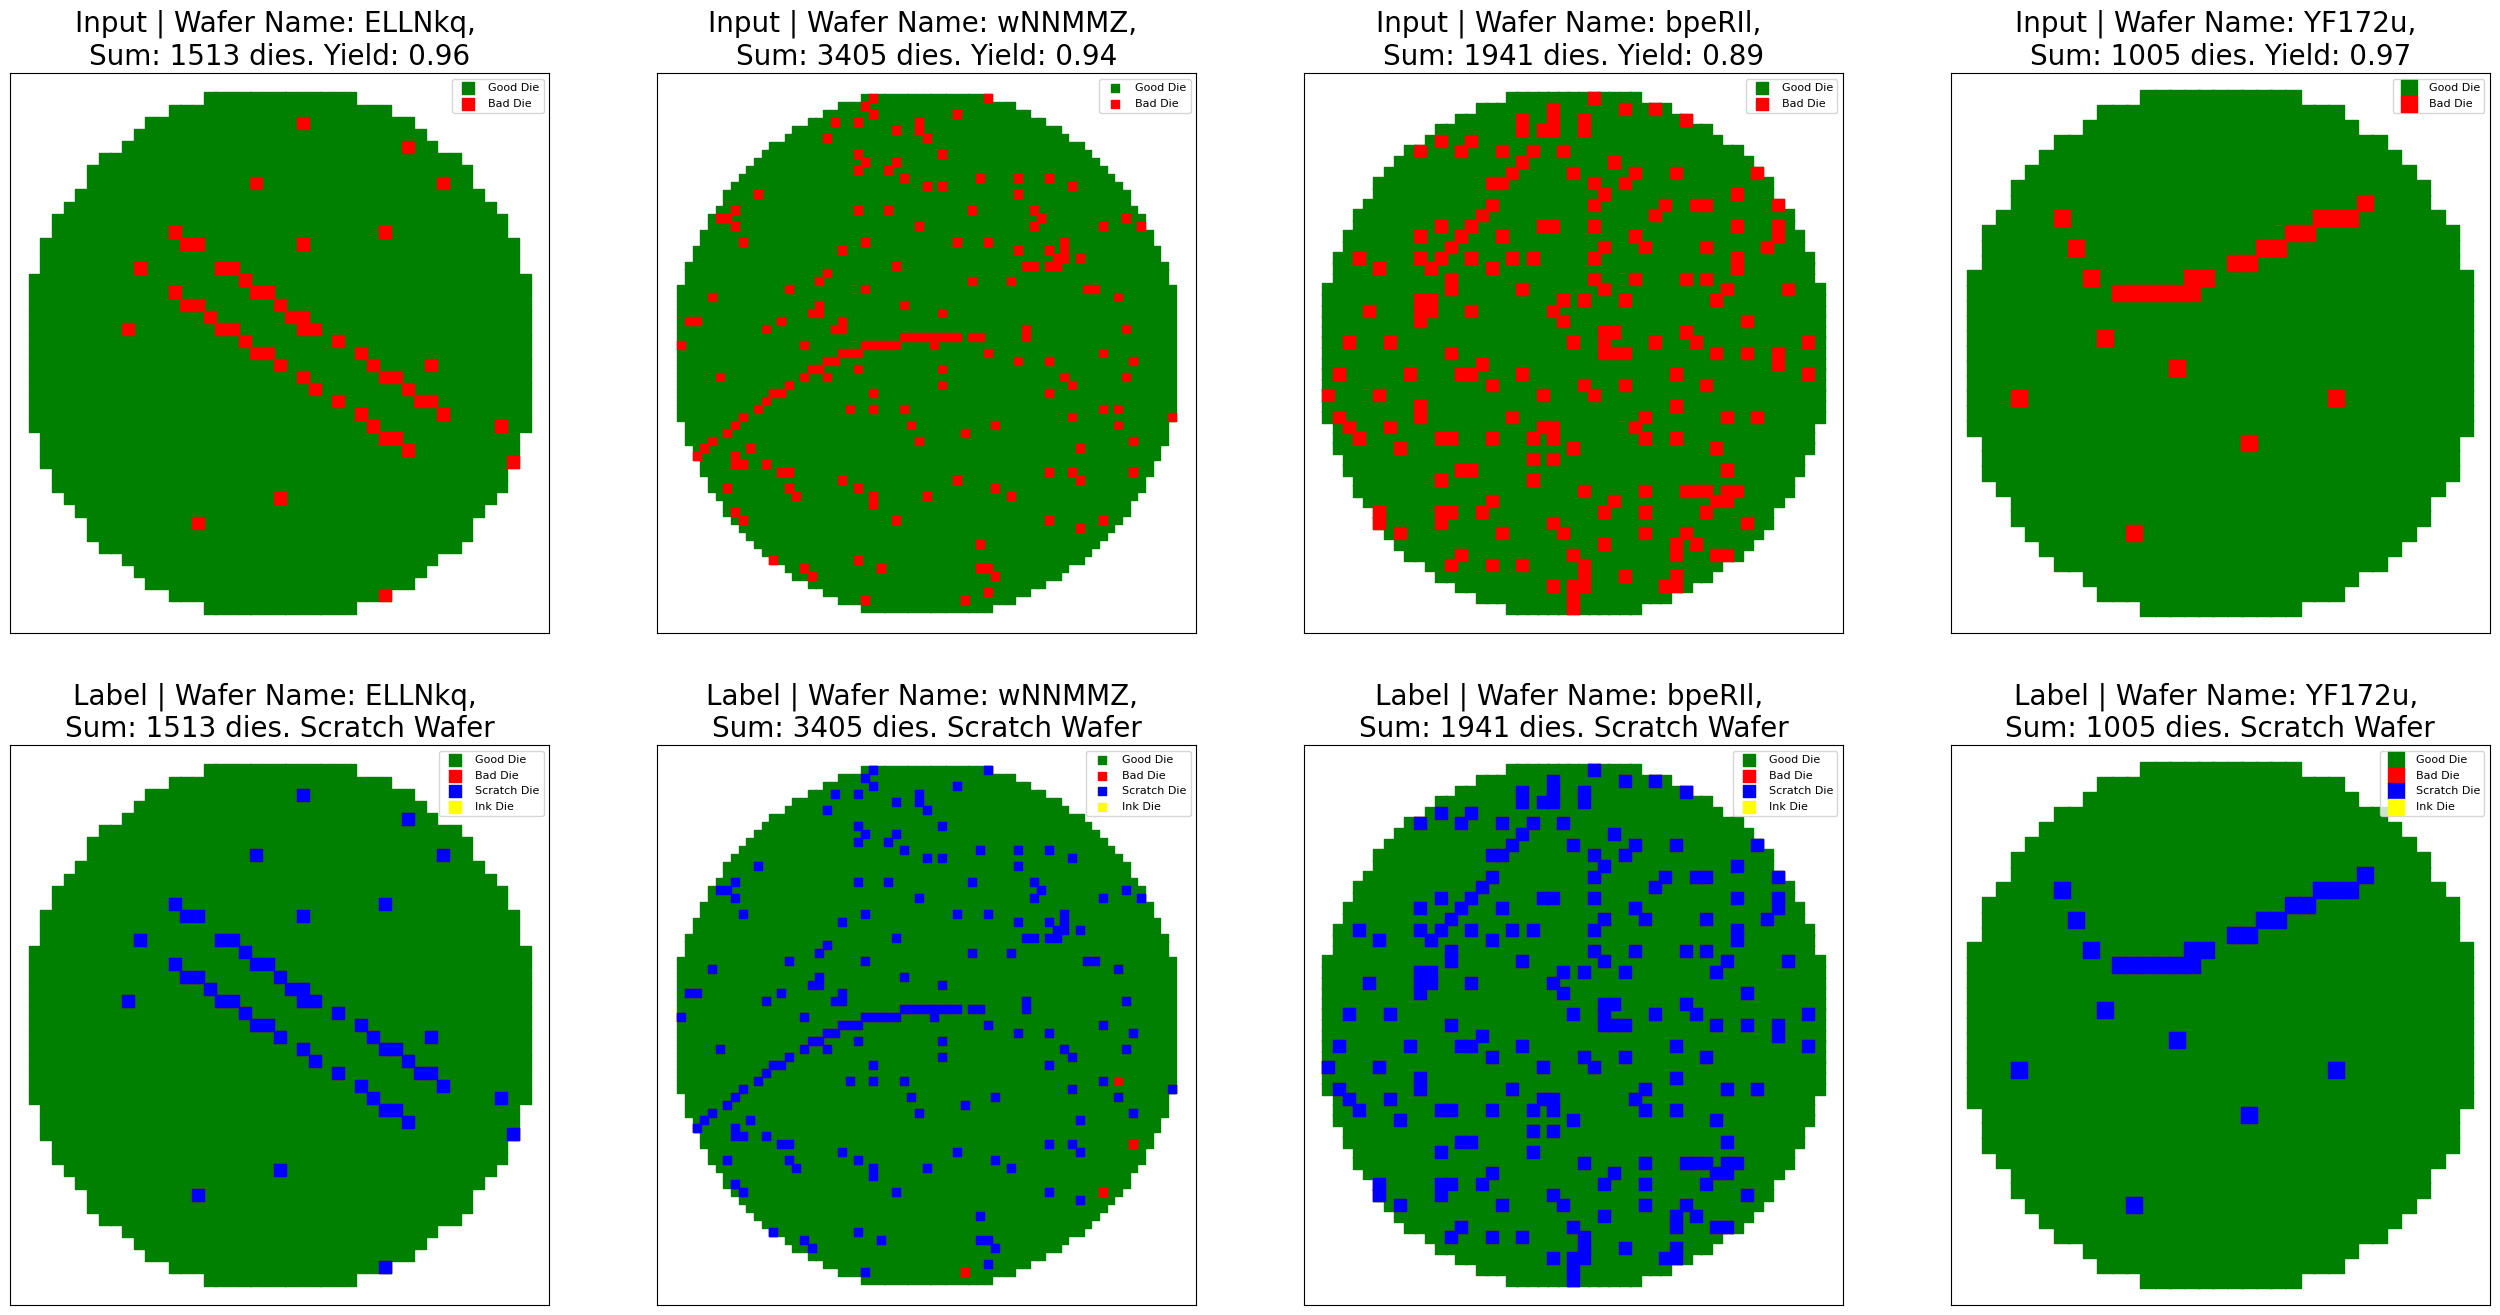

In [59]:
# We visualize 4 random wafers with predictions
sample_test_pred = [df_wafers_test.groupby('WaferName').get_group(g) for g in df_wafers_test['WaferName'].value_counts().sample(4, random_state=42).index]

# Change the column name inside the function if you want to visualize by 'IsScratchDie_Predicted'
# To do this, you can rename the column temporarily
for wafer_df in sample_test_pred:
    wafer_df['IsScratchDie'] = wafer_df['IsScratchDie_Predicted']

# Drawing(REALIZE)
plot_wafer_maps(sample_test_pred, figsize=8, labels=True)


# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [60]:
#TODO add your thoughts
'''This project addressed a real-world classification problem in semiconductor manufacturing — detecting scratch-related dies on wafer maps.
I used a `RandomForestClassifier` with basic spatial features (`DieX`, `DieY`) and manufacturing information (`IsGoodDie`) to predict whether a die is part of a scratch or ink defect.
Key considerations

1. Applied class balancing due to significant class imbalance between normal dies and scratches.
2. Implemented wafer-level filtering by excluding wafers with low yield (< 0.6), following business rules to avoid noisy or misleading scratch detections.
3. Achieved **84% recall** for the "Scratch" class, aligning with the industrial goal of not missing defective regions.
4. Conducted visual validation of predicted scratch patterns — the predicted regions clearly followed elongated bad-die clusters, confirming that the model captures scratch geometry effectively.

Potential future improvements

- Feature engineering**:
  - Local defect density, distance to wafer center/edge, edge proximity
  - Clustering/group-based features (e.g., DBSCAN)
  - Modeling**:
  - CNNs applied to logical wafer maps (converted to 2D image grids)
  - Graph Neural Networks to account for die adjacency
  - Deployment**:
  - Wrap the model into a real-time inference API using FastAPI or Flask
  - Integrate with manufacturing inspection systems or QA dashboards

I found this project very interesting and exciting- thank you so much for this opportunity )
Thank You!
                                                                                                        Nikita Marshchonok
'''




'This project addressed a real-world classification problem in semiconductor manufacturing — detecting scratch-related dies on wafer maps.\nI used a `RandomForestClassifier` with basic spatial features (`DieX`, `DieY`) and manufacturing information (`IsGoodDie`) to predict whether a die is part of a scratch or ink defect.\nKey considerations\n\n1. Applied class balancing due to significant class imbalance between normal dies and scratches.\n2. Implemented wafer-level filtering by excluding wafers with low yield (< 0.6), following business rules to avoid noisy or misleading scratch detections.\n3. Achieved **84% recall** for the "Scratch" class, aligning with the industrial goal of not missing defective regions.\n4. Conducted visual validation of predicted scratch patterns — the predicted regions clearly followed elongated bad-die clusters, confirming that the model captures scratch geometry effectively.\n\nPotential future improvements\n\n- Feature engineering**:\n  - Local defect dens

# Submission

In [61]:
#TODO

#model = (...)
X_test = df_wafers_test[['DieX', 'DieY', 'IsGoodDie']].copy()
X_test['IsGoodDie'] = X_test['IsGoodDie'].astype(int)
IsScratchDie = model.predict(X_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = '"Nikita Marshchonok"'
email = 'n.marshchonok@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)

Saved file: 20250425_"Nikita Marshchonok"_n.marshchonok@gmail.com_df_wafers_test_with_preds.csv
